(This notebook is based off Zach Alexander's/Ryan Henning's, with some minor modifications.)

In [48]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Exploratory Data Analysis

In [49]:
cars = pd.read_csv('data/cars_multivariate.csv')

You just received a bunch of data... what's your first move?

Start with a very high level overview
- What do the first few rows look like?
- What feature does each column denote?
- Which features are categorical and what is the distribution for the categorical levels?
- Which features are continuous and how would I characterize the distribution?
- Are there any missing values?
- What is the target denote? What is the target's distribution look like?
- How does the features relate to one another?
- How does each feature relate to the target?

In [50]:
cars.shape

(398, 9)

In [60]:
cars.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [52]:
cars.describe()
#horsepower not in here...why?

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [53]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Do the variable types make sense? Notice that HP has variable type 'object' - this doesn't seem right.

In [54]:
cars['horsepower'].tail()

393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, dtype: object

All the values that we can see look like numbers. If they were all numbers, Pandas should have figured out the correct data type---there must be a weird value in there somewhere

In [55]:
# Force convert horsepower to numeric
conv = pd.to_numeric(cars['horsepower'], 'coerce')
conv
#- If 'coerce', then invalid parsing will be set as NaN

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
       ...  
368     88.0
369     88.0
370     85.0
371     84.0
372     90.0
373     92.0
374      NaN
375     74.0
376     68.0
377     68.0
378     63.0
379     70.0
380     88.0
381     75.0
382     70.0
383     67.0
384     67.0
385     67.0
386    110.0
387     85.0
388     92.0
389    112.0
390     96.0
391     84.0
392     90.0
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, dtype: float64

In [56]:
# Check out the bad values
cars.ix[conv.isnull(),:]
#values that messed up pandas were question marks

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [57]:
# Reload the data, but tell pandas to treat '?' as missing
cars = pd.read_csv('data/cars_multivariate.csv', na_values=['?'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [58]:
# Let's just drop those rows
cars = cars.ix[cars.horsepower.notnull(), :]
# cars.horsepower.notnull() returns boolean array used as filter/indexer for cars
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [59]:
# What about origin? model? should they be numeric?
cars.origin.value_counts() #cars.origin equivalent to cars['origin']
# cars['model'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [61]:
cars['origin'] = cars['origin'].astype(str)
cars['model'] = cars['model'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null object
origin          392 non-null object
car_name        392 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 30.6+ KB


Our data set has 5-6 numeric variables and 3-4 categorical variables (cylinders is kind of a wild card). Sometimes it is good to keep track of these:

In [62]:
num_vars = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
cat_vars = ['model', 'origin', 'car_name']

## More Exploration

### Univariate-Numeric Viz

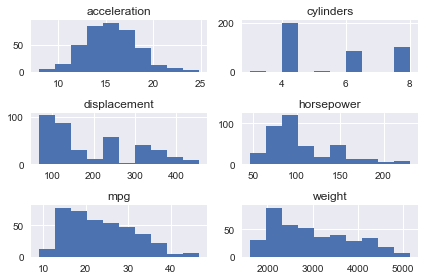

In [63]:
# Histograms
ax = cars[num_vars].hist(bins=10)
plt.tight_layout()

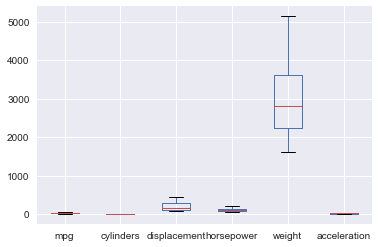

In [64]:
# Boxplots - visualize the minimum, first quartile, median, third quartile, and maximum
cars[num_vars].plot(kind='box')

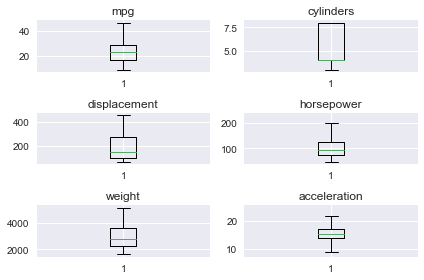

In [65]:
# To better visualize the boxplots, let's plot them one at a time.
fig, axes = plt.subplots(3,2)
#axes.ravel() flattens the list of lists axes
for ax, var in zip(axes.ravel(), num_vars):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()

### Univariate - Categorical

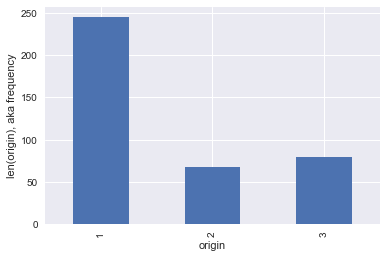

In [66]:
# Categorical
agg = cars.groupby('origin').apply(len)
agg.plot(kind='bar').set_ylabel('len(origin), aka frequency')

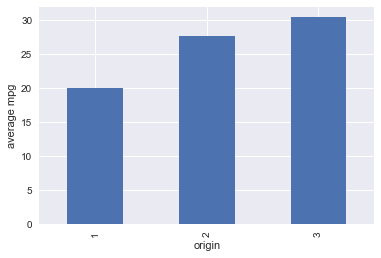

In [67]:
# Categorical vs Numeric
agg = cars.groupby('origin')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg')
#american cars have the lowest efficiency, followed by european followed by japanese

origin  cylinders
1       4            28.013043
        6            19.645205
        8            14.963107
2       4            28.106557
        5            27.366667
        6            20.100000
3       3            20.550000
        4            31.595652
        6            23.883333
Name: mpg, dtype: float64
cylinders      3          4          5          6          8
origin                                                      
1            NaN  28.013043        NaN  19.645205  14.963107
2            NaN  28.106557  27.366667  20.100000        NaN
3          20.55  31.595652        NaN  23.883333        NaN


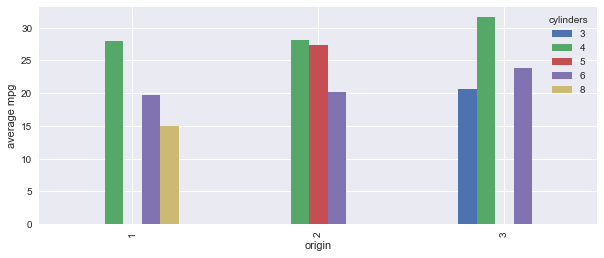

In [68]:
# Categorical vs categorical vs numeric
agg = cars.groupby(['origin','cylinders'])['mpg'].mean()
print agg
agg = agg.unstack(level='cylinders') #basically unflattening based on indicated field as new column, 
print agg
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('average mpg')

### Numeric vs Numeric

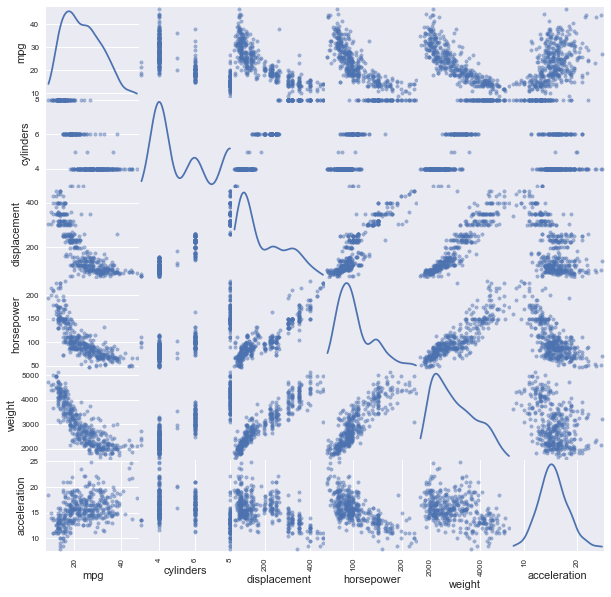

In [69]:
# Scatterplot matrix
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = scatter_matrix(cars[num_vars], ax=ax, diagonal='kde')

      mpg  cylinders  displacement  horsepower  weight  acceleration model  \
393  27.0          4         140.0        86.0  2790.0          15.6    82   
394  44.0          4          97.0        52.0  2130.0          24.6    82   
395  32.0          4         135.0        84.0  2295.0          11.6    82   
396  28.0          4         120.0        79.0  2625.0          18.6    82   
397  31.0          4         119.0        82.0  2720.0          19.4    82   

    origin         car_name binned_acceleration  
393      1  ford mustang gl        (15.2, 17.6]  
394      2        vw pickup        (22.4, 24.8]  
395      1    dodge rampage        (10.4, 12.8]  
396      1      ford ranger          (17.6, 20]  
397      1       chevy s-10          (17.6, 20]  


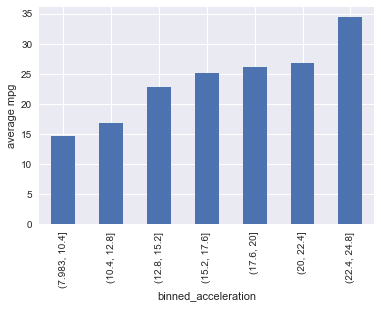

In [70]:
# Use binning to see relationships more clearly
cars['binned_acceleration'] = pd.cut(cars.acceleration, bins=7)
print cars.tail() #to see what the bins look like
agg = cars.groupby('binned_acceleration')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg')

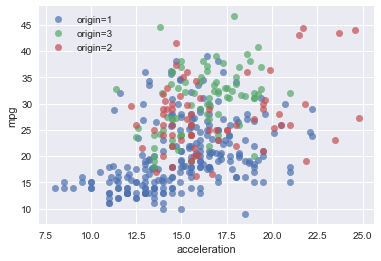

In [71]:
# Scatter plot by category
origins = cars['origin'].unique() #[1,2,3]
for origin in origins:
    plt.plot(cars.loc[cars.origin==origin,'acceleration'], 
             cars.loc[cars.origin==origin,'mpg'], 
             linestyle='',
             marker='o',
             alpha=.7,
             label="origin="+origin)
#for each origin (different color) plot mpg vs acceleration
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend(numpoints=1)

In [72]:
# Categorical vs Categorical
pd.crosstab(cars['origin'], cars['model']) #just returns a table of membership to these two categories

model,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


Aha! Model means model year --- we could have left this as numeric

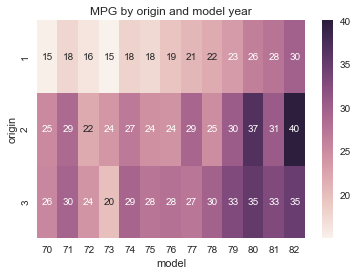

In [73]:
# Heat-map
import seaborn as sns

agg = cars.groupby(['origin','model'])['mpg'].mean()
ax = sns.heatmap(agg.unstack(level='model'), annot=True)
ax.set_title('MPG by origin and model year')

1. Europe and Japan have much more efficient cars than America
2. Efficiency increases over time!

## Linear Regression

(1000, 6000, 0, 50)

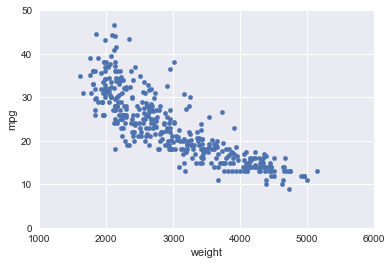

In [74]:
# Single variable regression
fig=cars.plot('weight','mpg',kind='scatter')
fig.axis((1000,6000,0,50))


Linear regression is just the fancy term for finding the line of best fit. If I was going to eyeball it from this data, I would draw the line from (1000,40) through (5500,5).

In other words, we are looking for the slope and intercept that defines a line that fits the data as well as possible.

'As well as possible' means that we are trying to minimize the mean-squared-error

-0.00888888888889 53.8888888889


(1000, 5500)

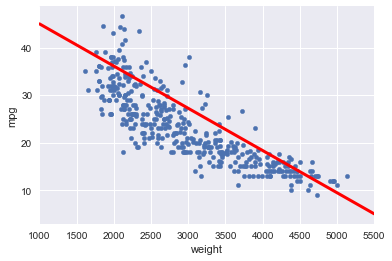

In [75]:
# Make a guess at the line of best fit
first_point = [1000,45]
second_point = [5500, 5]

# Solve 
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    X = [[p1[0], 1], [p2[0], 1]]
    y = [[p1[1]], [p2[1]]]
    soln = np.linalg.solve(X,y)
    return  soln[0][0], soln[1][0]

slope, intercept = get_line_equation(first_point, second_point)

print slope, intercept

# Plot the line along with the data
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

How can we measure the error? The typical choice is to use mean squared error. The error for a given data point is the difference between the observed value and the predicted value
$$
MSE := \frac{1}{n} \sum_{i=1}^n (y_i - (mx_i + b))^2
$$


In [76]:
# Mean Squared Error

def mean_squared_error(X, y, m, b):
    """
    Compute the mean squared error, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    error = y - pred
    mse = np.mean(error**2)
    return mse

mean_squared_error(cars['weight'], cars['mpg'], slope, intercept)

35.59094499874029

## R-Squared

Mean squared error is a good error metric, but it is not comparable across different data sets. For this we use a scaled version called $R^2$. 
\begin{align}
    R^2 &:= 1 - \frac{SS_{res}}{SS_{tot}} \\
    &= 1 - \frac{\sum_{i=1}^n (y_i - (mx_i + b))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    

Where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares. $R^2$ can be interpreted as the fraction of the variance in the data that is explained by the model.

$R^2$ will be between 0 and 1. 0 means that your model explains none of the variance in the data, while 1 means your model explains all of the variance in the data. The higher $R^2$, the better!

In [77]:
# Calculate r-squared

def r_squared(X, y, m, b):
    """
    Compute the r-squared, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    resid = y - pred
    rsquared = 1 - np.sum(resid**2)/np.sum((y-y.mean())**2)
    return rsquared

r_squared(cars['weight'], cars['mpg'], slope, intercept)
    

0.4142636439513324

## Ordinary least squares
It turns out that we can find the slope and intercept which *minimize* the mean squared error, using a procedure called ordinary least squares

Ordinary least squares is implemented in the statsmodels package. The advantage of this package is that we also have access to a number of *regression diagnostics.* 

In [79]:
import statsmodels.api as sm

# Choose the predictor and add a constant term
# (allow for an intercept)
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X) #This appends a column of ones to an array (for intercept)
y = cars['mpg']

print X.head()
print
print y.head()

# Create a linear regression object
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

   const  weight
0    1.0  3504.0
1    1.0  3693.0
2    1.0  3436.0
3    1.0  3433.0
4    1.0  3449.0

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          6.02e-102
Time:                        15:00:55   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Diagnostics

**coef** - The values of the coefficients in the model

**$P>|t|$** - The p-value of the null hypothesis that a specific parameter is zero.

**R-Squared** - Proportion of variance explained by the model. Measured on a scale from 0 (bad) to 1 (good)

**Prob (F-statistic)** - p-value of the F-statistic. This is the probability of the null hypothesis that *all parameters in the model are zero*

(1000, 5500)

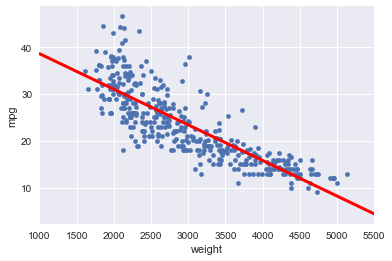

In [80]:
# Plot the line along with the data
slope = -.0076
intercept = 46.2165
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

This line is a better fit than our original guess. We can tell because its $R^2$ is higher, meaning it explains the mpg's variance better. The MSE of this fit will be lower (better) than our original guess as well.